# Factor Analysis of Mixed Data (FAMD)

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scientisttools.decomposition import FAMD
from scientisttools.extractfactor import get_eig,get_famd_ind,get_famd_col,get_famd_var,get_famd_mod
from scientisttools.pyplot import plotFAMD,plot_eigenvalues,plot_cosines,plot_contrib,plot_correlation_circle
from plydata import *

In [2]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AFDM_AUTOS",index_col=0)
display(D)

,puissance,longueur,hauteur,poids,CO2,origine,carburant,4X4
Modele,,,,,,,,
GOLF,75,421,149,1217,143,Europe,Diesel,non
CITRONC4,138,426,146,1381,142,France,Diesel,non
P607,204,491,145,1723,223,France,Diesel,non
VELSATIS,150,486,158,1735,188,France,Diesel,non
CITRONC2,61,367,147,932,141,France,Essence,non
CHRYS300,340,502,148,1835,291,Autres,Essence,non
AUDIA3,102,421,143,1205,168,Europe,Essence,non
OUTLAND,202,455,167,1595,237,Autres,Diesel,oui
PTCRUISER,223,429,154,1595,235,Autres,Essence,non


In [3]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, GOLF         to SANTA_FE    
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   puissance  10 non-null     int64 
 1   longueur   10 non-null     int64 
 2   hauteur    10 non-null     int64 
 3   poids      10 non-null     int64 
 4   CO2        10 non-null     int64 
 5   origine    10 non-null     object
 6   carburant  10 non-null     object
 7   4X4        10 non-null     object
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes


In [4]:
my_famd = FAMD(normalize=True,
               n_components=None,
               row_labels= D.index,
               quanti_labels= list(D.columns[:5]),
               quali_labels=list(D.columns[5:]),
               row_sup_labels=None,
               quanti_sup_labels=None,
               quali_sup_labels=None)
my_famd.fit(D)

FAMD(quali_labels=['origine', 'carburant', '4X4'],
     quanti_labels=['puissance', 'longueur', 'hauteur', 'poids', 'CO2'],
     row_labels=Index(['GOLF        ', 'CITRONC4    ', 'P607        ', 'VELSATIS    ',
       'CITRONC2    ', 'CHRYS300    ', 'AUDIA3      ', 'OUTLAND     ',
       'PTCRUISER   ', 'SANTA_FE    '],
      dtype='object', name='Modele'))

## Valeurs propres

In [5]:
eig = get_eig(my_famd)
print(eig)

       eigenvalue  difference  proportion  cumulative
Dim.1    4.273136    2.151248   47.479285   47.479285
Dim.2    2.121887    0.683169   23.576526   71.055811
Dim.3    1.438718    0.602351   15.985754   87.041565
Dim.4    0.836367    0.672337    9.292968   96.334533
Dim.5    0.164030    0.049560    1.822556   98.157089
Dim.6    0.114470    0.080845    1.271892   99.428982
Dim.7    0.033625    0.017820    0.373613   99.802594
Dim.8    0.015805    0.013844    0.175614   99.978208
Dim.9    0.001961    0.001961    0.021792  100.000000


## Informations sur les individus

In [6]:
row = get_famd_ind(my_famd)
print(row.keys())

dict_keys(['coord', 'cos2', 'contrib', 'infos'])


#### Coordonnées des individus

In [7]:
row_coord = row["coord"]
print(row_coord >> select("Dim.1","Dim.2") >> head())

                 Dim.1     Dim.2
Modele                          
GOLF          2.317805 -0.687271
CITRONC4      1.445368 -0.122286
P607         -0.779731  1.018563
VELSATIS     -0.541063 -0.160059
CITRONC2      3.275864  0.025117


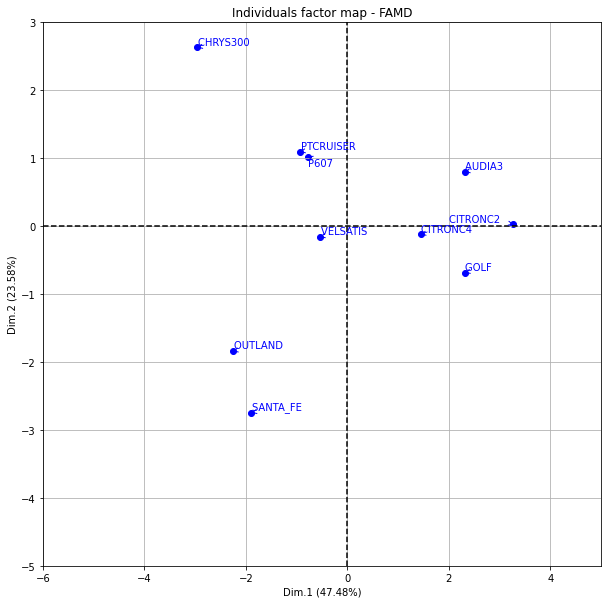

In [8]:
fig, axe =plt.subplots(figsize=(10,10))
plotFAMD(my_famd,ax=axe,xlim=(-6,5),ylim=(-5,3),repel=True)

In [9]:
cos2 = row["cos2"]
print(cos2>>select("Dim.1","Dim.2")>>head())

                 Dim.1     Dim.2
Modele                          
GOLF          0.601466  0.052883
CITRONC4      0.438205  0.003137
P607          0.105450  0.179942
VELSATIS      0.063969  0.005598
CITRONC2      0.732475  0.000043


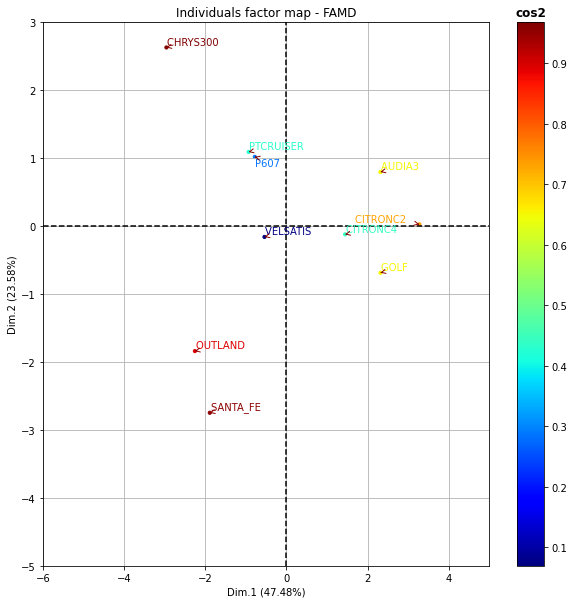

In [10]:
fig, axe =plt.subplots(figsize=(10,10))
plotFAMD(my_famd,color="cos2",ax=axe,xlim=(-6,5),ylim=(-5,3),repel=True)

In [11]:
contrib = row["contrib"]
print(contrib>>select("Dim.1","Dim.2")>>head())

                  Dim.1     Dim.2
Modele                           
GOLF          12.572078  2.226044
CITRONC4       4.888892  0.070475
P607           1.422797  4.889378
VELSATIS       0.685092  0.120737
CITRONC2      25.113374  0.002973


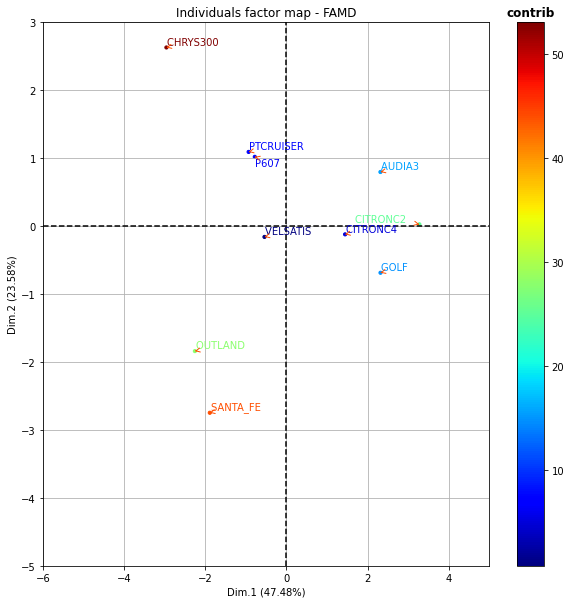

In [12]:
fig, axe =plt.subplots(figsize=(10,10))
plotFAMD(my_famd,color="contrib",ax=axe,xlim=(-6,5),ylim=(-5,3),repel=True)

In [13]:
pd.DataFrame(my_famd.row_infos_,index=D.index)

,0,1,2
Modele,,,
GOLF,2.988625,0.1,0.893188
CITRONC4,2.183433,0.1,0.476738
P607,2.401165,0.1,0.576559
VELSATIS,2.139256,0.1,0.457641
CITRONC2,3.827625,0.1,1.465072
CHRYS300,4.020953,0.1,1.616807
AUDIA3,3.037246,0.1,0.922486
OUTLAND,3.080184,0.1,0.948754
PTCRUISER,2.190984,0.1,0.480041


In [14]:
pd.DataFrame(my_famd.col_coord_[:,:2],index=D.columns[:5],columns=my_famd.dim_index_[:2])

,Dim.1,Dim.2
puissance,-0.819345,0.539186
longueur,-0.796182,0.244889
hauteur,-0.578377,-0.763585
poids,-0.929516,0.061131
CO2,-0.890662,0.378984


In [15]:
pd.DataFrame(my_famd.mod_coord_[:,:2],index=my_famd.mod_labels_,columns=my_famd.dim_index_[:2])

,Dim.1,Dim.2
origine_Autres,-2.008594,-0.217351
origine_Europe,2.316969,0.054035
origine_France,0.850110,0.190334
carburant_Diesel,-0.283747,-0.756570
carburant_Essence,0.425621,1.134856
4X4_non,0.518108,0.573546
4X4_oui,-2.072431,-2.294185


In [16]:
pd.DataFrame(my_famd.coord_mod_)

,0,1,2,3,4,5,6,7,8
0,-0.614538,-0.094369,0.428288,-0.103731,-0.025422,0.133227,-0.021513,-0.002860,0.019495
1,0.501259,0.016589,0.246903,0.696348,0.021173,-0.042601,0.012072,0.002593,-0.013692
2,0.260095,0.082639,-0.602875,-0.388662,0.010450,-0.103104,0.012977,0.001026,-0.009814
3,-0.106325,-0.402313,-0.424677,0.162042,-0.110840,0.085237,0.022825,-0.012585,0.000933
4,0.130221,0.492730,0.520122,-0.198460,0.135750,-0.104394,-0.027955,0.015413,-0.001143
5,0.224177,0.352170,-0.112145,0.015990,0.071545,0.082556,0.030806,-0.001585,0.001780
6,-0.448355,-0.704340,0.224289,-0.031980,-0.143089,-0.165112,-0.061611,0.003171,-0.003561


In [17]:
pd.DataFrame(my_famd.var_eta2_[:,:2])

,0,1
0,0.696567,0.016010
1,0.028262,0.404639
2,0.251277,0.620118


In [18]:
pd.DataFrame(my_famd.mod_cos2_[:,:2],index=my_famd.mod_labels_,columns=my_famd.dim_index_[:2])

,Dim.1,Dim.2
origine_Autres,2.689633,0.031494
origine_Europe,1.342086,0.000730
origine_France,0.481791,0.024151
carburant_Diesel,0.120769,0.858598
carburant_Essence,0.120769,0.858598
4X4_non,1.073743,1.315821
4X4_oui,1.073743,1.315821


In [19]:
pd.DataFrame(my_famd.mod_contrib_)

,0,1,2,3,4,5,6,7,8
0,8.837938,0.419701,12.749589,1.286521,0.393999,15.505654,1.376355,0.051742,19.378501
1,5.879996,0.012970,4.237196,57.976965,0.273307,1.585403,0.433381,0.042536,9.558247
2,1.583130,0.321845,25.262657,18.061192,0.066578,9.286550,0.500813,0.006664,4.910573
3,0.264558,7.627905,12.535535,3.139473,7.489731,6.346950,1.549401,1.002015,0.044431
4,0.396837,11.441858,18.803302,4.709210,11.234597,9.520424,2.324102,1.503023,0.066646
5,1.176080,5.844967,0.874141,0.030570,3.120546,5.953942,2.822243,0.015903,0.161609
6,4.704320,23.379868,3.496564,0.122279,12.482182,23.815768,11.288972,0.063612,0.646435


In [20]:
pd.DataFrame(my_famd.mod_vtest_)

,0,1,2,3,4,5,6,7,8
0,-2.380096,-0.365491,1.658752,-0.401747,-0.098459,0.515985,-0.083319,-0.011076,0.075505
1,1.681272,0.055643,0.828139,2.335622,0.071017,-0.142887,0.040490,0.008697,-0.045924
2,1.007343,0.320059,-2.334925,-1.505280,0.040474,-0.399318,0.050259,0.003975,-0.038009
3,-0.504342,-1.908337,-2.014422,0.768631,-0.525758,0.404315,0.108269,-0.059694,0.004428
4,0.504342,1.908337,2.014422,-0.768631,0.525758,-0.404315,-0.108269,0.059694,-0.004428
5,1.503828,2.362427,-0.752289,0.107263,0.479936,0.553803,0.206650,-0.010635,0.011943
6,-1.503828,-2.362427,0.752289,-0.107263,-0.479936,-0.553803,-0.206650,0.010635,-0.011943


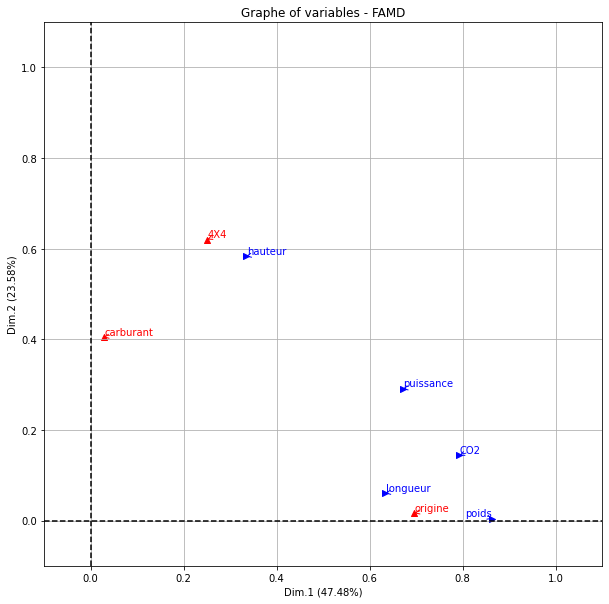

In [21]:
# 
fig, axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd,choice="var",repel=True,ax=axe)

In [22]:
# chargement des individus supplémentaire
row_sup = pd.DataFrame([136,446,168,1520,190,"Autres","Diesel","oui"],index=D.columns,columns=["X-TRAIL"]).T
row_sup_coord = my_famd.transform(row_sup)
pd.DataFrame(row_sup_coord[0],index=my_famd.dim_index_,columns=row_sup.index).T


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
X-TRAIL,-1.318885,-2.512626,0.660037,-0.164363,-0.260505,-0.084434,-0.137976,0.223623,0.330056


In [23]:
# chargement des données
varsup = pd.DataFrame({
    "prix" : [19140,23400,40550,38250,10700,54900,21630,29990,27400,27990],
    "surtaxe" : ["non","non","oui","oui","non","oui","non","oui","oui","oui"]
},index=D.index)
varsup

,prix,surtaxe
Modele,,
GOLF,19140,non
CITRONC4,23400,non
P607,40550,oui
VELSATIS,38250,oui
CITRONC2,10700,non
CHRYS300,54900,oui
AUDIA3,21630,non
OUTLAND,29990,oui
PTCRUISER,27400,oui


In [24]:
var_quant_sup_infos = my_famd._compute_quanti_sup_stats(varsup["prix"])
var_quant_sup_infos.keys()

dict_keys(['corr', 'coord', 'cos2', 'ftest'])

In [25]:
var_quant_sup_infos["corr"]

,puissance,longueur,hauteur,poids,CO2
prix,0.880187,0.948292,0.069255,0.864805,0.835326


In [26]:
pd.DataFrame(var_quant_sup_infos["coord"])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
prix,-0.804104,0.454902,-0.275091,0.172402,0.041537,-0.106965,-0.002639,0.119633,0.116607


In [27]:
pd.DataFrame(var_quant_sup_infos["cos2"])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
prix,0.646584,0.206935,0.075675,0.029723,0.001725,0.011442,0.000007,0.014312,0.013597


In [28]:
pd.DataFrame(var_quant_sup_infos["ftest"])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
prix,-2.937098,1.298703,-0.747063,0.460735,0.10996,-0.28409,-0.006982,0.318043,0.309922


#### Variables qualitatives supplémentaires

In [29]:
var_qual_sup_infos = my_famd._compute_quali_sup_stats(varsup["surtaxe"])
var_qual_sup_infos.keys()

dict_keys(['chi2', 'coord', 'cos2', 'dist', 'eta2', 'vtest'])

In [30]:
var_qual_sup_infos["chi2"]["statistic"]

,origine,carburant,4X4
surtaxe,5.833333,0.0,0.234375


In [31]:
var_qual_sup_infos["chi2"]["pvalue"]

,origine,carburant,4X4
surtaxe,0.054114,1.0,0.628299


In [32]:
var_qual_sup_infos["coord"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
surtaxe_non,2.338792,0.002725,0.151900,0.109839,-0.102048,0.024850,-0.036605,0.034331,0.003473
surtaxe_oui,-1.559195,-0.001817,-0.101267,-0.073226,0.068032,-0.016567,0.024403,-0.022888,-0.002316


In [33]:
var_qual_sup_infos["cos2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
surtaxe_non,0.642114,8.718459e-07,0.002709,0.001416,0.001222,0.000072,0.000157,0.000138,1.416287e-06
surtaxe_oui,0.445847,6.053602e-07,0.001881,0.000983,0.000849,0.000050,0.000109,0.000096,9.833889e-07


In [34]:
var_qual_sup_infos["vtest"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
surtaxe_non,2.771367,0.004583,0.310202,0.294194,-0.617191,0.179909,-0.48897,0.668908,0.192117
surtaxe_oui,-2.771367,-0.004583,-0.310202,-0.294194,0.617191,-0.179909,0.48897,-0.668908,-0.192117


In [35]:
var_qual_sup_infos["dist"]

,dist
surtaxe_non,8.518658
surtaxe_oui,5.452737


In [36]:
var_qual_sup_infos["eta2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
0,0.853386,0.000002,0.010692,0.009617,0.042325,0.003596,0.026566,0.049715,0.004101


In [37]:
from scientisttools.pyplot import plotFAMD

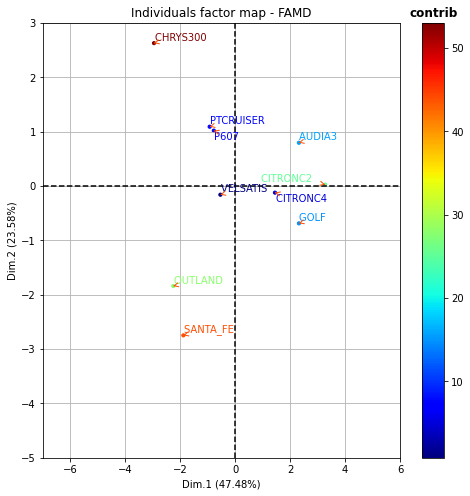

In [38]:
# 
fig, axe =plt.subplots(figsize=(8,8))
plotFAMD(my_famd,choice ="ind",color="contrib",xlim=(-7,6),ylim=(-5,3),repel=True)

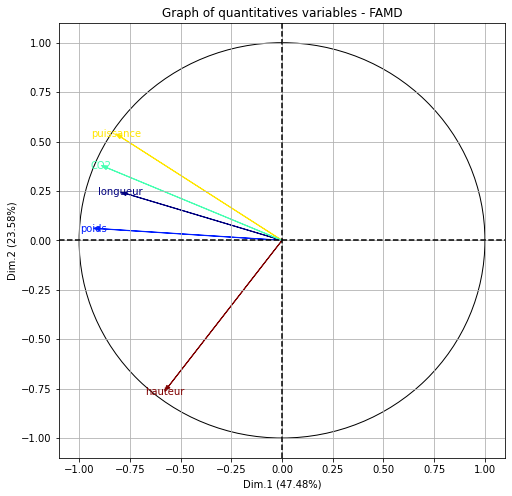

In [39]:
fig, axe =plt.subplots(figsize=(8,8))
plotFAMD(my_famd,choice ="col",color="contrib",epel=True)

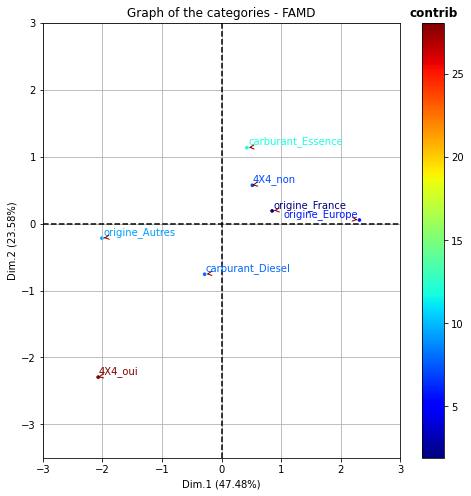

In [40]:
fig, axe =plt.subplots(figsize=(8,8))
plotFAMD(my_famd,choice ="mod",color="contrib",xlim=(-3,3),ylim=(-3.5,3),repel=True,short_labels=False)

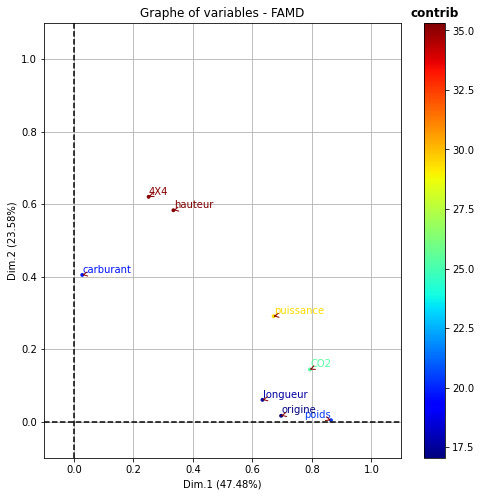

In [41]:
fig, axe =plt.subplots(figsize=(8,8))
plotFAMD(my_famd,choice ="var",color="contrib",repel=True)

##


In [42]:
# 
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AFDM_TENNIS",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Djokovic,188,droitier,deux,79,34,17,vainqueur,114
Edberg,187,droitier,une,41,36,6,finale,1
Federer,185,droitier,une,103,54,20,vainqueur,24
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4


In [43]:
quali_labels = list(D.select_dtypes(include=["object"]))
quanti_labels = list(D.select_dtypes(include=np.number))
my_famd2 = FAMD(normalize=True,
               n_components=2,
               row_labels= D.index,
               quanti_labels= quanti_labels,
               quali_labels=quali_labels,
               row_sup_labels=None,
               quanti_sup_labels=None,
               quali_sup_labels=None)
my_famd2.fit(D)

FAMD(n_components=2, quali_labels=['Lateralite', 'MainsRevers', 'RolandGarros'],
     quanti_labels=['Taille', 'Titres', 'Finales', 'TitresGC',
                    'BestClassDouble'],
     row_labels=Index(['Agassi', 'Becker', 'Borg', 'Connors', 'Courier', 'Djokovic', 'Edberg',
       'Federer', 'Kafelnikov', 'Kuerten', 'Lendl', 'McEnroe', 'Murray',
       'Nadal', 'Nastase', 'Rafter', 'Safin', 'Sampras', 'Vilas', 'Wilander'],
      dtype='object', name='Joueur'))

In [44]:
get_eig(my_famd2)

,eigenvalue,difference,proportion,cumulative
Dim.1,3.100885,1.574654,34.454279,34.454279
Dim.2,1.526231,0.348425,16.958125,51.412404


In [45]:
pd.DataFrame(my_famd2.row_coord_,columns=my_famd2.dim_index_)

,Dim.1,Dim.2
0,-0.525858,1.206655
1,1.319872,-1.089276
2,-1.428784,3.374996
3,-3.219605,0.426121
4,1.634467,1.203651
5,-0.926075,0.894837
6,0.705409,-1.923419
7,-2.523321,-0.921028
8,1.908150,0.863067
9,2.320907,-0.046681


In [46]:
pd.DataFrame(my_famd2.row_infos_,index=D.index)

,0,1,2
Joueur,,,
Agassi,1.816841,0.05,0.165046
Becker,2.539517,0.05,0.322457
Borg,4.409229,0.05,0.972065
Connors,4.345099,0.05,0.943994
Courier,2.358551,0.05,0.278138
Djokovic,2.431828,0.05,0.295689
Edberg,2.819990,0.05,0.397617
Federer,3.638408,0.05,0.661901
Kafelnikov,2.470996,0.05,0.305291


In [47]:
pd.DataFrame(my_famd2.col_coord_,columns=my_famd2.dim_index_)

,Dim.1,Dim.2
0,0.685398,-0.152959
1,-0.933778,-0.143072
2,-0.859790,-0.282608
3,-0.671014,0.066300
4,-0.373610,0.664545


In [48]:
pd.DataFrame(my_famd2.mod_coord_,columns=my_famd2.dim_index_)

,Dim.1,Dim.2
0,0.526869,0.125360
1,-2.107474,-0.501439
2,0.021748,0.940118
3,-0.021748,-0.940118
4,0.690216,-0.269322
5,0.354293,-1.525081
6,-0.376163,0.493488


In [49]:
from scientisttools.extractfactor import summaryFAMD

In [50]:
summaryFAMD(my_famd2,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |
|:------------------------|--------:|--------:|
| Variance                |   3.101 |   1.526 |
| Difference              |   1.575 |   0.348 |
| % of var.               |  34.454 |  16.958 |
| Cumulative of % of var. |  34.454 |  51.412 |

Individuals (the 10 first)

| Joueur     |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |
|:-----------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|-------:|-------:|
| Agassi     |    1.817 |   0.05 |    0.165 |  -0.526 |  0.446 |  0.084 |   1.207 |  4.77  |  0.441 |
| Becker     |    2.54  |   0.05 |    0.322 |   1.32  |  2.809 |  0.27  |  -1.089 |  3.887 |  0.184 |
| Borg       |    4.409 |   0.05 |    0.972 |  -1.429 |  3.292 |  0.105 |   3.375 | 37.316 |  0.586 |
| Connors    |    4.345 |   0.05 |    0.944 |  -3.22  | 16.714 | 

In [51]:
row = get_famd_ind(my_famd2)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos'])

In [52]:
row_coord = row["coord"]
row_coord >> head(6)

,Dim.1,Dim.2
Joueur,,
Agassi,-0.525858,1.206655
Becker,1.319872,-1.089276
Borg,-1.428784,3.374996
Connors,-3.219605,0.426121
Courier,1.634467,1.203651
Djokovic,-0.926075,0.894837


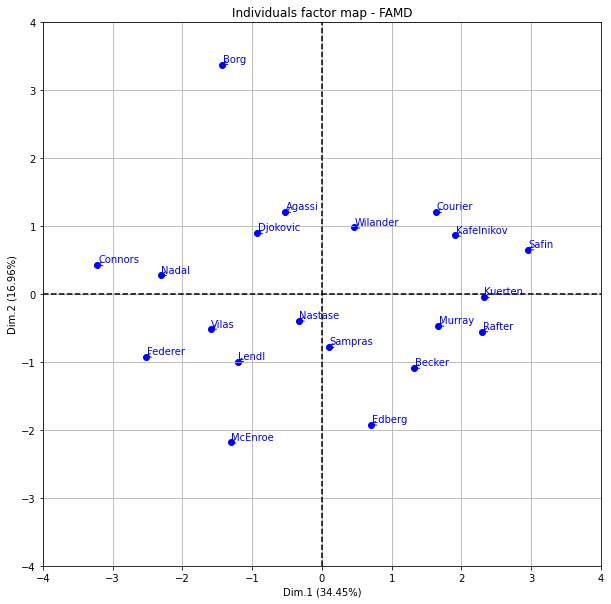

In [53]:
fig,axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd2,choice="ind",xlim=(-4,4),ylim=(-4,4),repel=True,ax=axe)

In [54]:
row_cos2 = row["cos2"]
row_cos2 >> head(6)

,Dim.1,Dim.2
Joueur,,
Agassi,0.083773,0.441095
Becker,0.270123,0.183981
Borg,0.105005,0.585897
Connors,0.549042,0.009618
Courier,0.480244,0.260442
Djokovic,0.145020,0.135401


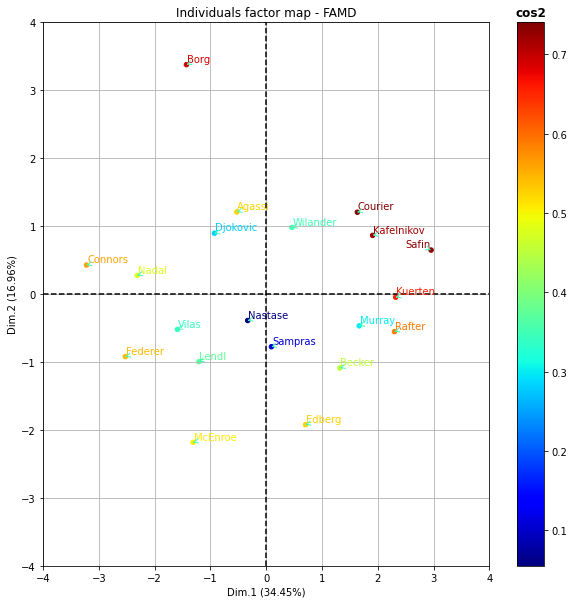

In [55]:
fig,axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd2,choice="ind",color="cos2",xlim=(-4,4),ylim=(-4,4),repel=True,ax=axe)

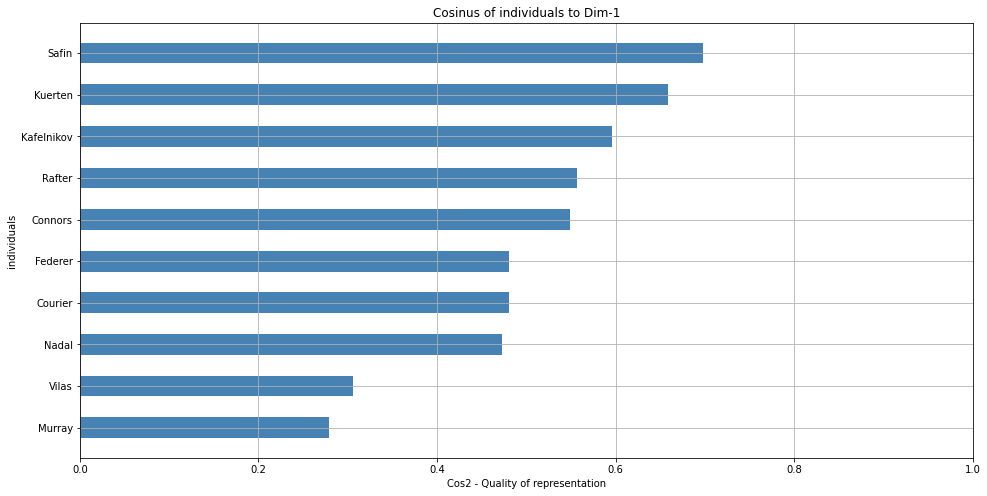

In [56]:
fig,axe =plt.subplots(figsize=(16,8))
plot_cosines(my_famd2,choice="ind",ax=axe)

In [57]:
row_cos2 = row["contrib"]
row_cos2 >> head(6)

,Dim.1,Dim.2
Joueur,,
Agassi,0.445884,4.769975
Becker,2.808974,3.887098
Borg,3.291681,37.316093
Connors,16.714355,0.594861
Courier,4.307612,4.746253
Djokovic,1.382855,2.623237


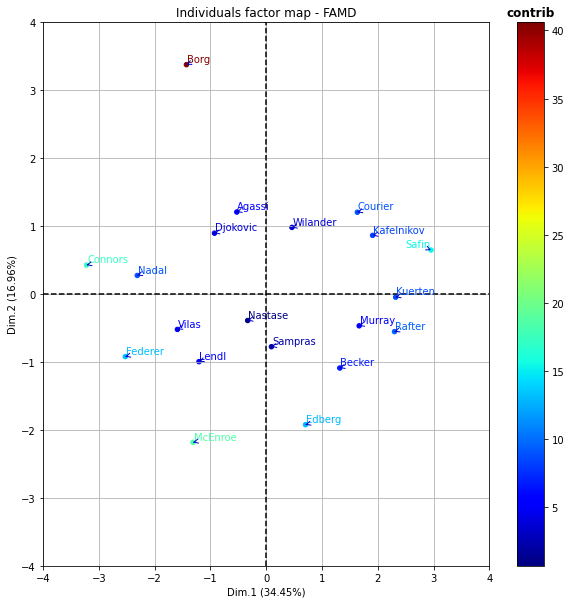

In [58]:
fig,axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd2,choice="ind",color="contrib",xlim=(-4,4),ylim=(-4,4),repel=True,ax=axe)

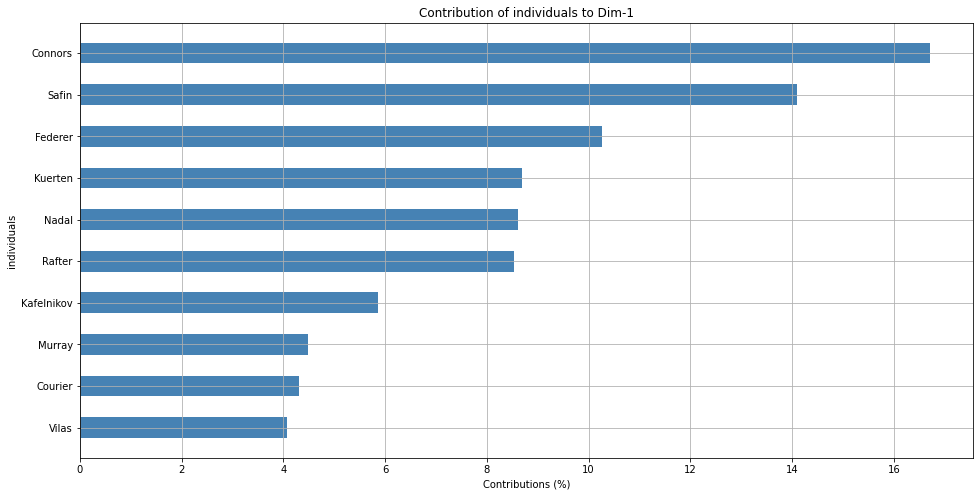

In [59]:
fig,axe =plt.subplots(figsize=(16,8))
plot_contrib(my_famd2,choice="ind",ax=axe)

In [60]:
row_infos = row["infos"]
row_infos >> head(6)

,"d(i,G)",p(i),"I(i,G)"
Joueur,,,
Agassi,1.816841,0.05,0.165046
Becker,2.539517,0.05,0.322457
Borg,4.409229,0.05,0.972065
Connors,4.345099,0.05,0.943994
Courier,2.358551,0.05,0.278138
Djokovic,2.431828,0.05,0.295689


In [61]:
col = get_famd_col(my_famd2)
col.keys()

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'ftest'])

In [62]:
col_corr = col["corr"]
col_corr

,Taille,Titres,Finales,TitresGC,BestClassDouble
Taille,1.000000,-0.458630,-0.453484,-0.159513,-0.429777
Titres,-0.458630,1.000000,0.889289,0.697721,0.245463
Finales,-0.453484,0.889289,1.000000,0.511686,0.093875
TitresGC,-0.159513,0.697721,0.511686,1.000000,0.137085
BestClassDouble,-0.429777,0.245463,0.093875,0.137085,1.000000


In [63]:
col_pcorr = col["pcorr"]
col_pcorr

,Taille,Titres,Finales,TitresGC,BestClassDouble
Taille,1.000000,-0.096841,-0.166973,0.182091,-0.398499
Titres,-0.096841,1.000000,0.846483,0.628914,0.301539
Finales,-0.166973,0.846483,1.000000,-0.319361,-0.351576
TitresGC,0.182091,0.628914,-0.319361,1.000000,-0.069279
BestClassDouble,-0.398499,0.301539,-0.351576,-0.069279,1.000000


In [64]:
col_coord = col["coord"]
col_coord >> head(6)

,Dim.1,Dim.2
Taille,0.685398,-0.152959
Titres,-0.933778,-0.143072
Finales,-0.859790,-0.282608
TitresGC,-0.671014,0.066300
BestClassDouble,-0.373610,0.664545


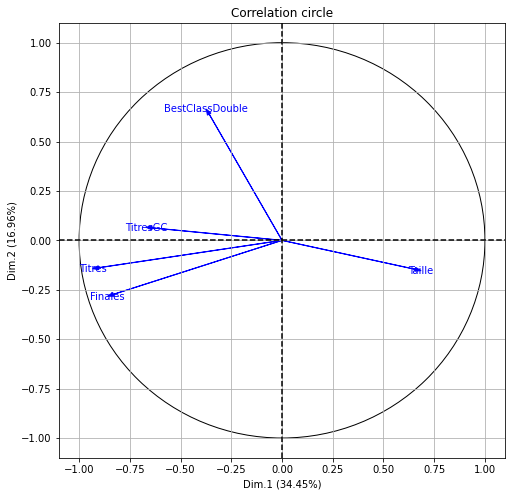

In [65]:
fig,axe =plt.subplots(figsize=(8,8))
plot_correlation_circle(my_famd2,ax=axe)

In [66]:
col_cos2 = col["cos2"]
col_cos2 >> head(6)

,Dim.1,Dim.2
Taille,0.469770,0.023396
Titres,0.871942,0.020470
Finales,0.739239,0.079867
TitresGC,0.450260,0.004396
BestClassDouble,0.139584,0.441619


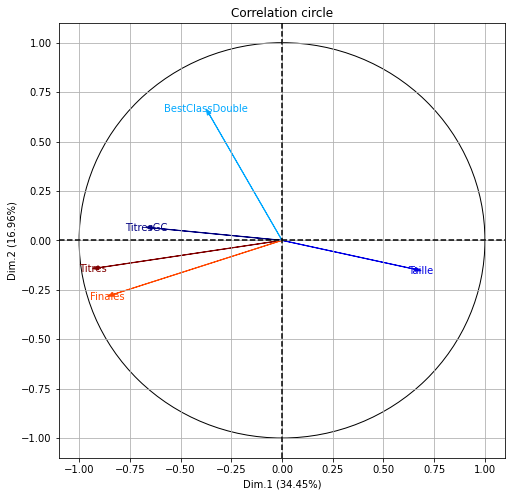

In [67]:
fig,axe =plt.subplots(figsize=(8,8))
plot_correlation_circle(my_famd2,color="cos2",ax=axe)

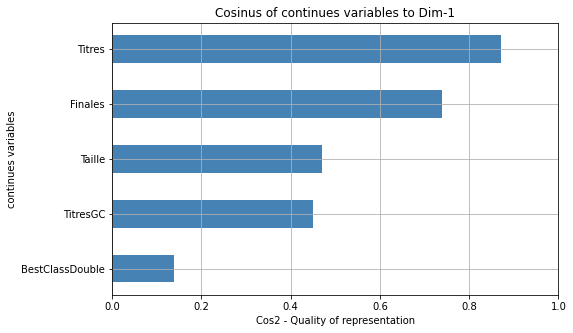

In [68]:
fig,axe =plt.subplots(figsize=(8,5))
plot_cosines(my_famd2,choice="var",ax=axe)

In [69]:
col_contrib = col["contrib"]
col_contrib >> head(6)

,Dim.1,Dim.2
Taille,15.149538,1.532957
Titres,28.119130,1.341194
Finales,23.839609,5.232974
TitresGC,14.520358,0.288005
BestClassDouble,4.501431,28.935287


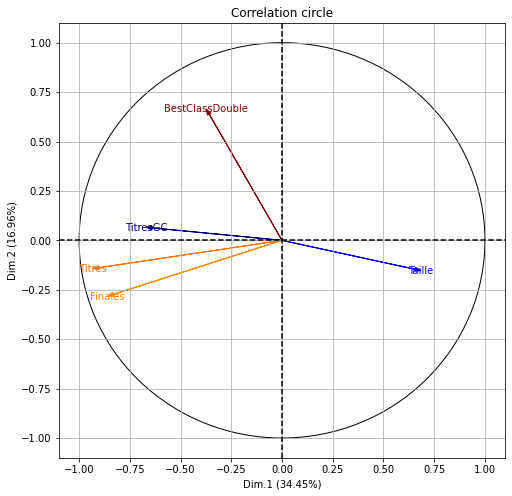

In [70]:
fig,axe =plt.subplots(figsize=(8,8))
plot_correlation_circle(my_famd2,color="contrib",ax=axe)

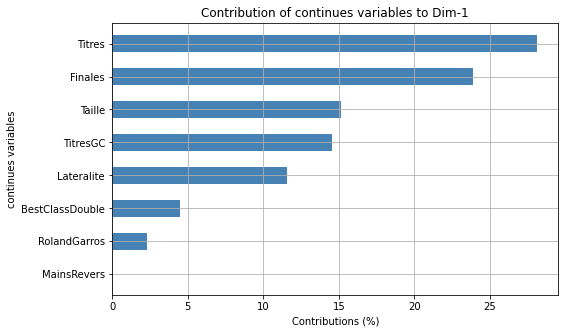

In [71]:
fig,axe = plt.subplots(figsize=(8,5))
plot_contrib(my_famd2,choice="var",ax=axe)

In [72]:
col_ftest = col["ftest"]
col_ftest >> head(6)

,Dim.1,Dim.2
Taille,3.460207,-0.635655
Titres,-6.956139,-0.593978
Finales,-5.329274,-1.197821
TitresGC,-3.350374,0.273762
BestClassDouble,-1.618780,3.302231


## Categories

In [73]:
mod = get_famd_mod(my_famd2)
mod.keys()

dict_keys(['stats', 'coord', 'cos2', 'contrib', 'vtest', 'infos'])

In [74]:
mod_stats = mod["stats"]
mod_stats >> head(6)

,n(k),p(k)
Lateralite_droitier,16.0,0.80
Lateralite_gaucher,4.0,0.20
MainsRevers_deux,10.0,0.50
MainsRevers_une,10.0,0.50
RolandGarros_demi,5.0,0.25
RolandGarros_finale,3.0,0.15


In [75]:
mod_coord = mod["coord"]
mod_coord >> head(6)

,Dim.1,Dim.2
Lateralite_droitier,0.526869,0.125360
Lateralite_gaucher,-2.107474,-0.501439
MainsRevers_deux,0.021748,0.940118
MainsRevers_une,-0.021748,-0.940118
RolandGarros_demi,0.690216,-0.269322
RolandGarros_finale,0.354293,-1.525081


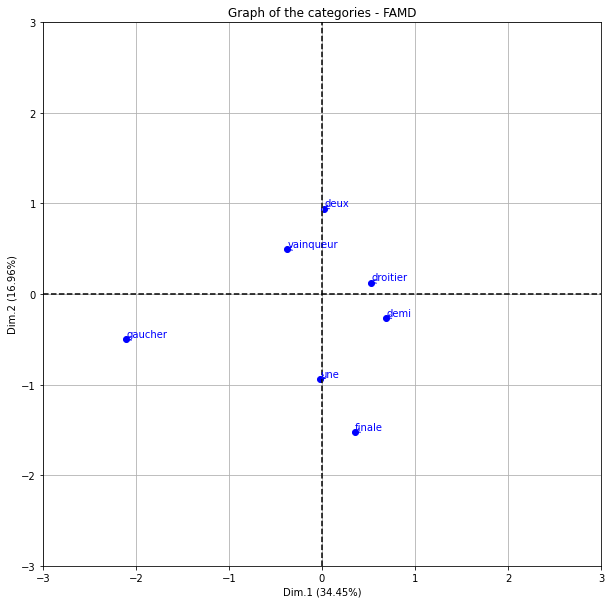

In [76]:
fig,axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd2,choice="mod",xlim=(-3,3),ylim=(-3,3),repel=True,short_labels=True,ax=axe)

In [77]:
mod_cos2 = mod["cos2"]
mod_cos2 >> head(6)

,Dim.1,Dim.2
Lateralite_droitier,1.110362,0.062860
Lateralite_gaucher,1.110362,0.062860
MainsRevers_deux,0.000473,0.883821
MainsRevers_une,0.000473,0.883821
RolandGarros_demi,0.158799,0.024178
RolandGarros_finale,0.022151,0.410448


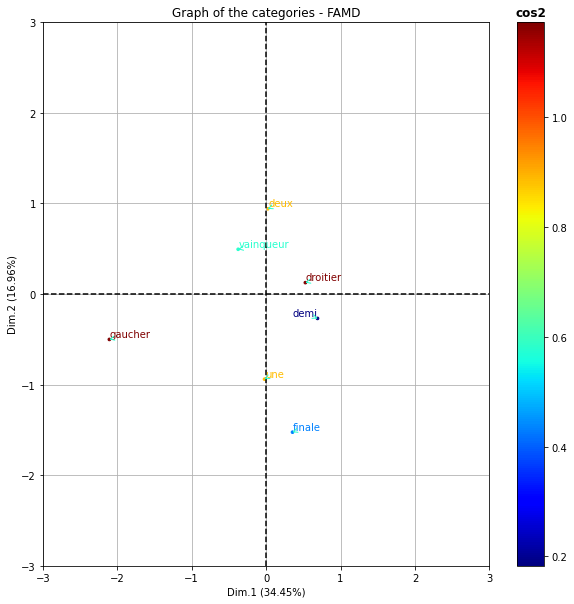

In [78]:
fig,axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd2,choice="mod",color="cos2",xlim=(-3,3),ylim=(-3,3),repel=True,short_labels=True,ax=axe)

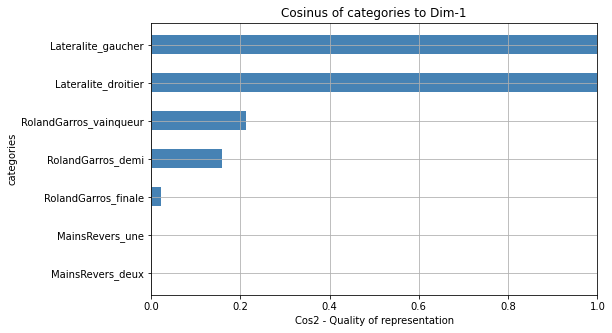

In [79]:
fig,axe =plt.subplots(figsize=(8,5))
plot_cosines(my_famd2,choice="mod",ax=axe)

In [80]:
mod_contrib = mod["contrib"]
mod_contrib >> head(6)

,Dim.1,Dim.2
Lateralite_droitier,2.309527,0.539716
Lateralite_gaucher,9.238110,2.158865
MainsRevers_deux,0.002460,18.971152
MainsRevers_une,0.002460,18.971152
RolandGarros_demi,1.238621,0.778471
RolandGarros_finale,0.195814,14.977402


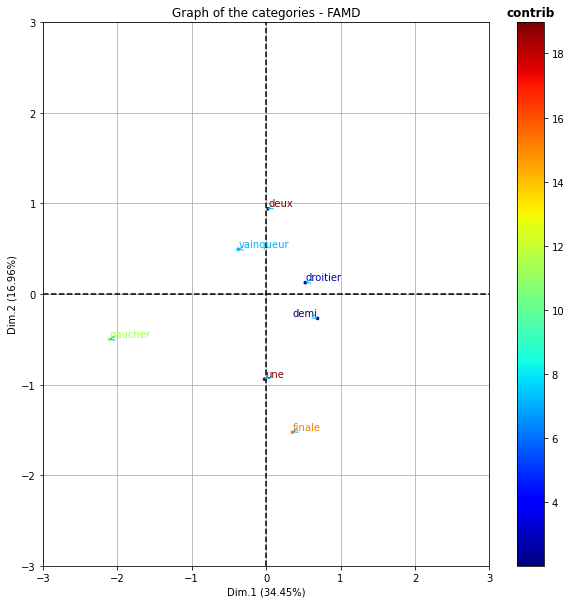

In [81]:
fig,axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd2,choice="mod",color="contrib",xlim=(-3,3),ylim=(-3,3),repel=True,short_labels=True,ax=axe)

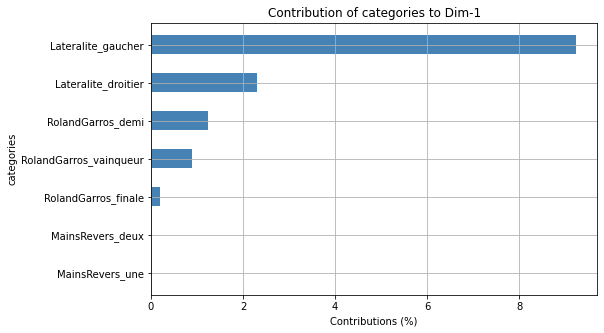

In [82]:
fig,axe = plt.subplots(figsize=(8,5))
plot_contrib(my_famd2,choice="mod",ax=axe)

In [83]:
mod_vtest = mod["vtest"]
mod_vtest

,Dim.1,Dim.2
Lateralite_droitier,2.608352,0.884616
Lateralite_gaucher,-2.608352,-0.884616
MainsRevers_deux,0.053834,3.317026
MainsRevers_une,-0.053834,-3.317026
RolandGarros_demi,0.986412,-0.548627
RolandGarros_finale,0.368411,-2.260454
RolandGarros_vainqueur,-1.140396,2.132498


In [84]:
mod_infos = mod["infos"]
mod_infos

,"d(k,G)",p(k),"I(k,G)"
Lateralite_droitier,0.500000,0.114286,0.028571
Lateralite_gaucher,2.000000,0.028571,0.114286
MainsRevers_deux,1.000000,0.071429,0.071429
MainsRevers_une,1.000000,0.071429,0.071429
RolandGarros_demi,1.732051,0.035714,0.107143
RolandGarros_finale,2.380476,0.021429,0.121429
RolandGarros_vainqueur,0.816497,0.085714,0.057143


## Categorical variables

In [85]:
var = get_famd_var(my_famd2)
var.keys()

dict_keys(['chi2', 'eta2', 'cos2', 'contrib'])

In [86]:
var_chi2 = var["chi2"]
var_chi2["statistic"]

,Lateralite,MainsRevers,RolandGarros
Lateralite,160.0,7.500000,6.4
MainsRevers,7.5,14.238281,0.0
RolandGarros,6.4,0.000000,16.2


In [87]:
var_chi2["pvalue"]

,Lateralite,MainsRevers,RolandGarros
Lateralite,3.506399e-10,0.483767,0.602520
MainsRevers,4.837674e-01,0.000161,1.000000
RolandGarros,6.025197e-01,1.000000,0.000057


In [88]:
var_eta2 = var["eta2"]
var_eta2

,Dim.1,Dim.2
Lateralite,0.358079,0.041187
MainsRevers,0.000153,0.579087
RolandGarros,0.071859,0.336209


In [89]:
var_cos2 = var["cos2"]
var_cos2

,Dim.1,Dim.2
Lateralite,0.358079,0.041187
MainsRevers,0.000153,0.579087
RolandGarros,0.035930,0.168104


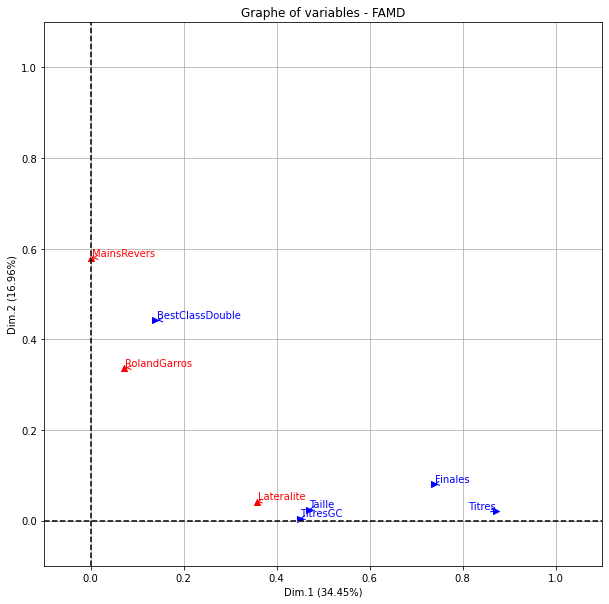

In [90]:
fig,axe = plt.subplots(figsize=(10,10))
plotFAMD(my_famd2,choice="var",repel=True,ax=axe)

In [91]:
var_contrib = var["contrib"]
var_contrib

,Dim.1,Dim.2
Lateralite,11.547637,2.698581
MainsRevers,0.004919,37.942303
RolandGarros,2.317377,22.028698


In [92]:
summaryFAMD(my_famd2,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |
|:------------------------|--------:|--------:|
| Variance                |   3.101 |   1.526 |
| Difference              |   1.575 |   0.348 |
| % of var.               |  34.454 |  16.958 |
| Cumulative of % of var. |  34.454 |  51.412 |

Individuals (the 10 first)

| Joueur     |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |
|:-----------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|-------:|-------:|
| Agassi     |    1.817 |   0.05 |    0.165 |  -0.526 |  0.446 |  0.084 |   1.207 |  4.77  |  0.441 |
| Becker     |    2.54  |   0.05 |    0.322 |   1.32  |  2.809 |  0.27  |  -1.089 |  3.887 |  0.184 |
| Borg       |    4.409 |   0.05 |    0.972 |  -1.429 |  3.292 |  0.105 |   3.375 | 37.316 |  0.586 |
| Connors    |    4.345 |   0.05 |    0.944 |  -3.22  | 16.714 | 

In [93]:
pd.DataFrame(my_famd.eigen_vectors_)

,0,1,2,3,4,5,6,7,8
0,-0.396363,0.370150,0.032435,-0.029145,-0.395339,0.211470,0.004070,0.536560,-0.463744
1,-0.385158,0.168116,-0.357254,0.344782,0.169403,-0.370150,0.032980,0.365031,0.526157
2,-0.279793,-0.524199,0.124555,-0.105006,0.502210,0.058204,0.479528,0.284520,-0.232139
3,-0.449659,0.041966,-0.227349,0.126256,0.426298,0.156867,-0.536109,-0.362203,-0.321678
4,-0.430863,0.260172,0.156608,0.006833,-0.174514,-0.264816,0.527809,-0.582974,-0.055417
5,-0.297287,-0.064784,0.357066,-0.113425,-0.062769,0.393772,-0.117318,-0.022747,0.440210
6,0.242487,0.011389,0.205844,0.761426,0.052279,-0.125913,0.065832,0.020624,-0.309164
7,0.125822,0.056731,-0.502620,-0.424985,0.025803,-0.304738,0.070768,0.008163,-0.221598
8,-0.051435,-0.276187,-0.354056,0.177186,-0.273674,0.251932,0.124475,-0.100101,0.021079
9,0.062995,0.338258,0.433628,-0.217007,0.335181,-0.308552,-0.152450,0.122598,-0.025816
